In [408]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import datetime as datetime

Importer les datasets

In [409]:
df_aeronefs = pd.read_csv('/Users/um/Desktop/Wild Code School/Top_gun/0_df_aeronef_clean.csv')
df_composants = pd.read_csv('/Users/um/Desktop/Wild Code School/Top_gun/1_df_composants_clean.csv')

In [410]:
df_aeronefs['ref_aero'].nunique()

231

In [411]:
df_aeronefs['type_model'].nunique()

15

# Aeronefs charts

In [412]:
df_aeronefs.head()

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint
0,E170_6353,E170,2000-03-17,2024-03-27,0,1970-01-01
1,B767_2803,B767,2020-12-03,2024-06-01,0,1970-01-01
2,CRJ700_6943,CRJ700,2015-01-29,2024-06-02,1,2024-06-03
3,A350_1177,A350,2005-08-07,2024-01-04,0,1970-01-01
4,B777_4029,B777,2009-01-01,2024-06-01,0,1970-01-01


In [413]:
fig = px.pie(
    df_aeronefs,
    names = 'type_model',
    title  = "Parts des modèles d'aéronefs sur la flotte totale",
    color_discrete_sequence = px.colors.sequential.Viridis_r,
    width = 800,
    height = 600
)
fig.show()


In [414]:
df_sum_by_model = df_aeronefs.groupby('type_model').size().reset_index(name='count').sort_values(by='count', ascending=False)

fig = px.bar(
    df_sum_by_model ,
    x='type_model',
    y='count',
    title="Répartitions des aéronefs par modèles",
    color='type_model',
    orientation='v',
    text = 'count',
    color_discrete_sequence=px.colors.sequential.Viridis_r
)

fig.show()

In [415]:
fig = px.pie(
    df_aeronefs,
    names = 'en_maintenance',
    title  = "Parts des modèles d'aéronefs en maintenance",
    color = df_aeronefs['en_maintenance'],
    color_discrete_sequence=px.colors.sequential.Viridis_r,
    width = 600,
    height = 500)

fig.show()

In [416]:
df_composants

,ref_compo,categorie,aero,desc,lifespan,taux_usure_actuel,cout
0,REAE170-E170_6353-0,2,E170_6353,Réacteur gauche,13045.0,53.308375,15552.0
1,REAE170-E170_6353-1,2,E170_6353,Réacteur droit,13626.0,50.111950,17559.0
2,SYSE170-E170_6353-2,2,E170_6353,Système de navigation,10541.0,16.730575,16514.0
3,ORDE170-E170_6353-3,2,E170_6353,Ordinateur de vol,10441.0,6.653075,16047.0
4,AUTE170-E170_6353-4,2,E170_6353,Autopilote,14847.0,42.033525,19362.0
...,...,...,...,...,...,...,...
10435,SYSCRJ700-CRJ700_2988-40,0,CRJ700_2988,Systèmes d'oxygène d'urgence,13038.0,53.323168,4745.0
10436,PORCRJ700-CRJ700_2988-41,0,CRJ700_2988,Portes passagers,13107.0,16.392552,3053.0
10437,HUBCRJ700-CRJ700_2988-42,0,CRJ700_2988,Hublots,68978.0,34.551008,3593.0
10438,ECLCRJ700-CRJ700_2988-43,0,CRJ700_2988,Éclairage de la cabine,10639.0,36.706904,4965.0


# Composants Charts

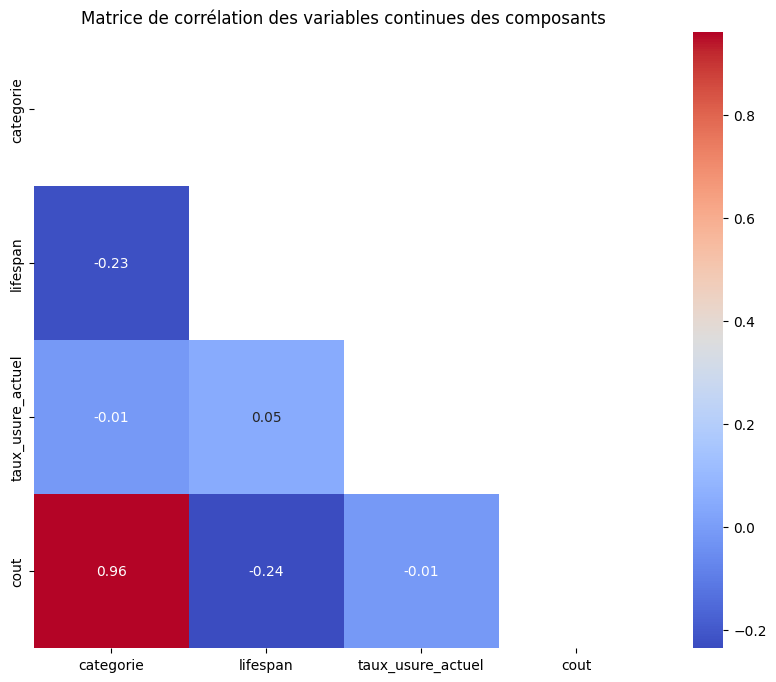

In [417]:
plt.figure(figsize=(10, 8))

correlation_matrix = df_composants[['categorie', 'lifespan', 'taux_usure_actuel', 'cout']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask = mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des variables continues des composants')
plt.show()

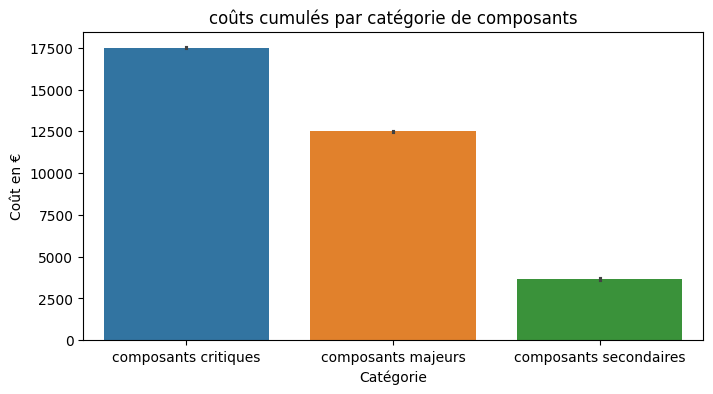

In [428]:
plt.figure(figsize=(8,4))

labels = {
    0 :'composants secondaires',
    1 : 'composants majeurs',
    2 : 'composants critiques'
}
df_composants['categorie_labels'] = df_composants['categorie'].map(labels)

fig = sns.barplot(
    df_composants,
    x = 'categorie_labels',
    y = 'cout',
    hue = 'categorie_labels'
     
)
plt.title('coûts cumulés par catégorie de composants')
plt.xlabel('Catégorie')
plt.ylabel('Coût en €')

plt.show()

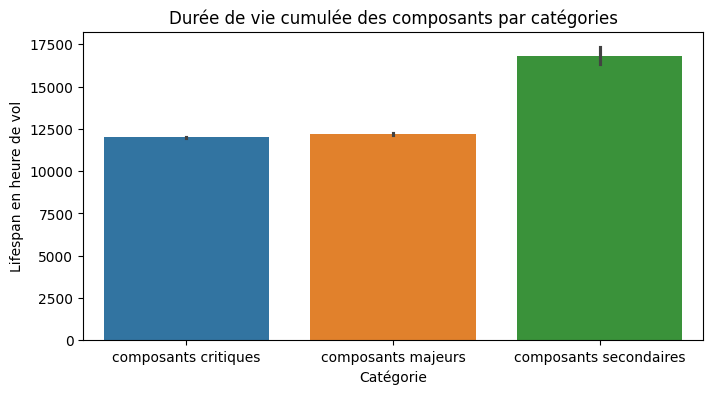

In [429]:
plt.figure(figsize=(8,4))

labels = {
    0 :'composants secondaires',
    1 : 'composants majeurs',
    2 : 'composants critiques'
}
df_composants['categorie_labels'] = df_composants['categorie'].map(labels)

fig = sns.barplot(
    df_composants,
    x = 'categorie_labels',
    y = 'lifespan',
    hue = 'categorie_labels'
     
)
plt.title('Durée de vie cumulée des composants par catégories')
plt.xlabel('Catégorie')
plt.ylabel('Lifespan en heure de vol')

plt.show()

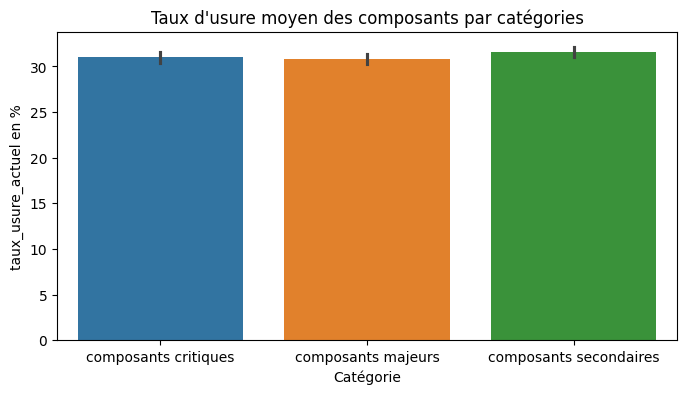

In [433]:
plt.figure(figsize=(8,4))

labels = {
    0 :'composants secondaires',
    1 : 'composants majeurs',
    2 : 'composants critiques'
}
df_composants['categorie_labels'] = df_composants['categorie'].map(labels)

fig = sns.barplot(
    df_composants,
    x = 'categorie_labels',
    y = 'taux_usure_actuel',
    hue = 'categorie_labels'
     
)
plt.title("Taux d'usure moyen des composants par catégories")
plt.xlabel('Catégorie')
plt.ylabel("taux_usure_actuel en %")

plt.show()